## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. \
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

---

## План работы

Составим небольшой план работы:
- Познакомимся с данными
- Выполним предобработку данных: приведем в порядок названия колонок, преобразуем типы, избавимся от дубликатов, проверим аномалии, заполним пропуски
- Сделаем рассчеты: посчитаем суммарные продажи для каждой игры
- Выполним исследовательский анализ данных: посмотрим зависимость продаж от регионов, жанров, платформ, оценок. посмотрим сколько игр выпускалось в разные годы. Определим "срок жизни" платформ, определим актуальный период для анализа данных. Изучим данные на выбросы и обработаем их. 
- Составим потенциальные портреты пользователей по регионам
- Проверим гипотезы: Отличаются ли среднии оценки пользователей для 2х платформ и 2х жанров игр

---

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Итого в нашем распоряжении:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

---

## Предобработка данных

Выполним предобработку данных: приведем в порядок названия колонок, преобразуем типы, избавимся от дубликатов, проверим аномалии, заполним пропуски

Заменим название колонок на нижний регистр. 

In [4]:
df.columns = [col.lower() for col in df.columns]
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обработаем пропуски в данных

In [6]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Пропуски наблюдаются в следующих колонках:
- `name` 
- `year_of_release` 
- `genre`
- `critic_score`
- `user_score`
- `rating`


В колонке `name` менее одного процентра попусков. Предлагаю удалить их. 

In [8]:
display(df[df['name'].isna()])
df = df.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в колонке `year_of_release`. Можно попробовать заполнить пропуски следующим образом - посмотреть для каждой игры, в которой не указан год релиза, год релиза на другой игровой платформе и взять это значение. Но немного подумав, я скорее откажусь от такого варианта, тк:
- Некоторые игры выпускаются эксклюзивно для определенной платформы. Например игра могла выйти на PS в 2005 году, а на остальные плафтормы уже в 2006
- Год релиза на других платформах может отличаться. 
- Таких пропусков всего 1.6%. Это очень мало

Поскольку таких пропусков очень мало (<2%) предлагаю от них избавиться

In [9]:
df = df.dropna(subset=['year_of_release']) #код ревьюера

Пропуски в колонке `genre` были вызваны отсутсвием названия игры. Удалив такие строки, пропуски в `genre` тоже ушли

In [10]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Необработанными остались колонки с оценками пользователей и критикив, а также рейтинг ESRB. Покрутив данные и поизучав их, у меня нет едиснтвенного правильного предполодения о природе данных пропусков. Игры разных жанров, разных годов, для разных платформ. Также есть игры с большим объемом продаж, а есть почти с нулевым. Предлагаю пока оставить пропуски в этих колонках. \
Также в колонке с оценкой пользователя есть аббревиатура tbd, что означает "подлежит определению", т.е. рейтинг для таких игр еще не определен. Заменю такие данные на NaN

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [12]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

С пропусками разобрались и по пути "потеряли" менее 300 строк, что равно примерно 2%. Теперь посмотрим на дубликаты

In [13]:
df.duplicated().sum()

0

Дубликатов нет. Для завершения предобработки приведем типы данных к нужным

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [15]:
# Цикл пробегается по списку колонок и меняет тип данных на более экономичный
# Также заменим user_score на float
for col in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'user_score']:
        df[col] = df[col].astype('float32')

In [16]:
# Также заменим тип данных для года релиза на целочисленный
df['year_of_release'] = df['year_of_release'].astype('int32')

Пропуски в столбце `rating` заменим на "Unknown", это позволить не потерять нам эти данные при анализе. 

In [17]:
df['rating'] = df['rating'].fillna('Unknown')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float32
 5   eu_sales         16444 non-null  float32
 6   jp_sales         16444 non-null  float32
 7   other_sales      16444 non-null  float32
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float32
 10  rating           16444 non-null  object 
dtypes: float32(5), float64(1), int32(1), object(4)
memory usage: 1.1+ MB


---

## Рассчеты

С предобработкой закончили. Можно двигаться дальше. Посчитаем суммарные продажи во всех регионах и добавим их в отдельный столбец

In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,Unknown,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,Unknown,31.380001


---

## EDA

### Кол-во выпускаемых игр по годам

Посмотрим сколько игр выпускалось в разные года.

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

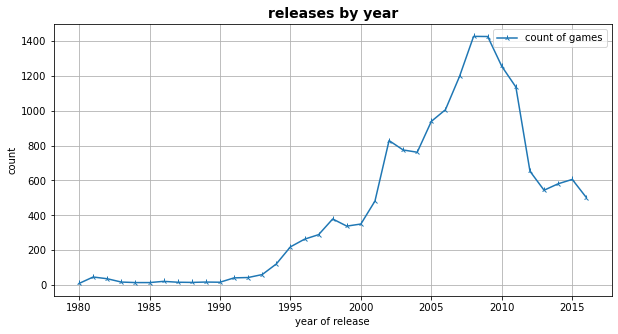

In [21]:
df.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(10,5), marker='2')
plt.title('releases by year', fontsize=14, fontweight="bold")
plt.xlabel('year of release')
plt.ylabel('count')
plt.legend(['count of games'])
display(df.groupby('year_of_release')['name'].count())

<div style="border:solid blue 2px; padding: 20px">
Можно заметить, что до 1995 года рост выпускаемых игр хоть и был, но кол-во игр все равно было очень незначительным. Думаю, данные до 1995 года в целом не важны, тк игр выпускалось очень мало. После 2010 года также заметен сильный спад. Веротяно, это связано с развитием мобильных устройств и игр для них. 

---

### Изменения продаж по платформам

Посмотрим как менялись продажи по платформам

<AxesSubplot:xlabel='platform'>

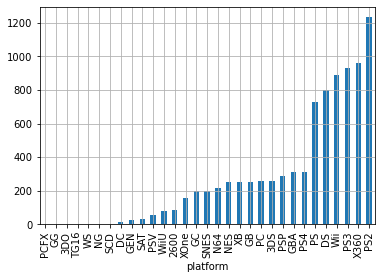

In [22]:
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind='bar', grid=True)

Выберем топ-5 платформ по продажам и построим распределение по годам. 

In [23]:
top5_platforms = (df.groupby('platform', as_index=False)['total_sales']
 .sum()
 .sort_values('total_sales', ascending=False)
 .reset_index(drop=True)
 .head(5)
)
top5_platforms

,platform,total_sales
0,PS2,1233.559937
1,X360,961.239990
2,PS3,931.339966
3,Wii,891.179993
4,DS,802.780029


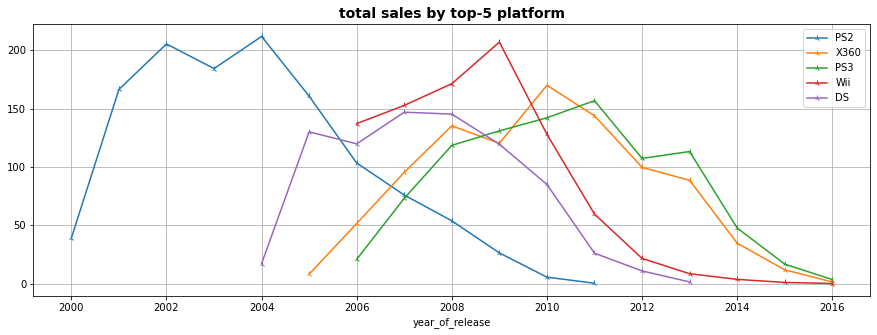

In [24]:
for i in list(top5_platforms['platform']):
    (df[(df['platform'] == i) & (df['year_of_release'] >= 1995)]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(grid=True, figsize=(15,5), marker='2')
    )
    plt.legend(top5_platforms['platform'])
    plt.title('total sales by top-5 platform', fontsize=14, fontweight="bold")

<div style="border:solid blue 2px; padding: 20px">
На графике видно как начинают расти продажи игр после выпуска новой платформы. Пик продаж для каждой платформы приходится примерно на 5й год после релиза новой версии. Также, можно заметить, что через 10 лет для каждой платформы продажи практически на нуле. Можно предположить, что "срок жизни" для платформ около 10 лет. 

---

### Актуальный период


Определим актульный период для всех платформ, с учетом того, что это поможет нам построить прогноз на 2017 год. Считаю, что наиболее характерным признаком для определения актуального периода является появление и быстрое развития рынка мобильных устройств. С 2010 года для всех платформ резко снизилось количество выпускаемых игр. Считаю верным взять данные за 2014-2016 года, поскольку такую динамичную индустрию как игры, стоит рассматривать за не очень большой период

Возьмем данные за актуальный период и посмотрим на продажи по платформам. Выясним какие платформы лидируют, какие растут и какие падают. На основе этих данных попробуем выбрать несколько потенциальных платформ. 

In [25]:
# Создадим датафрейм для актулаьного периода
df_actual = df[df['year_of_release'] >= 2014].copy()

Поскольку нам важно отработать сам принцип анализа данных, в будущем достаточно поменять условие создания актуального датафрейма в строчке выше, и анализ будет произведен для любого другого периода

year_of_release,2014,2015,2016,All
platform,,,,
PSP,0.240000,0.120000,0.000000,0.360000
Wii,3.750000,1.140000,0.180000,5.070000
PSV,11.900000,6.250000,4.250000,22.400000
PC,13.280001,8.520000,5.250000,27.050001
WiiU,22.030001,16.350000,4.600000,42.980000
X360,34.740002,11.960000,1.520000,48.220001
PS3,47.759998,16.820000,3.600000,68.180000
3DS,43.759998,27.780001,15.140000,86.680000
XOne,54.070000,60.139999,26.150000,140.360001


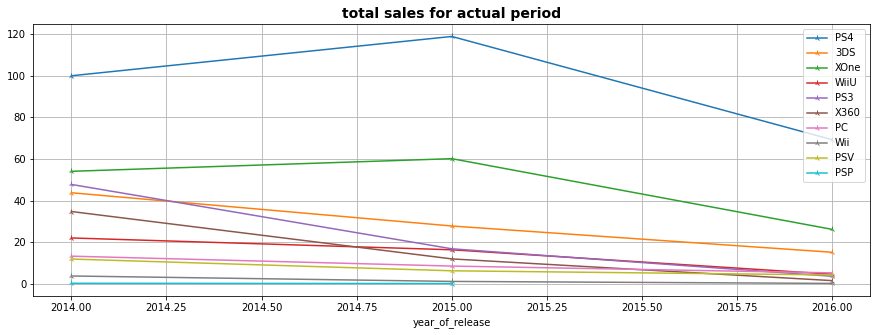

In [26]:
# Для наглядности соберем сводник для каждый платформы с продажами по годам и суммой всех продаж за актуальный период.
display(pd.pivot_table(
    df_actual, 
    index='platform', 
    values='total_sales', 
    columns='year_of_release', 
    aggfunc='sum', 
    fill_value=0, 
    margins=True
).sort_values('All')
       )

# Построим график распределения по продажам за актуальный период. 
for i in list(df_actual['platform'].unique()):
    (df_actual[df_actual['platform'] == i]
     .groupby('year_of_release')['total_sales']
     .sum()
     .plot(grid=True, figsize=(15,5), marker='2')
    )
    plt.legend(df_actual['platform'].unique())
    plt.title('total sales for actual period', fontsize=14, fontweight="bold")

<div style="border:solid blue 2px; padding: 20px">
Как мы уже обсуждали выше, с 2010 года сумма продаж по всем платформам неизбежно снижается. 
    
    
В наш список для актуального периода попали 11 платформ. Самыми быстрорастущими за этот период можно назвать PS4, XOne и 3DS. PS4 и вовсе продали более 125 млн копий за первые 2 календарных года существования платформы. 
Некоторые из них уже явно "мертвы" и ожидать от них всплеска не стоит: PSP, DS, Wii. 
    
Думаю, что стоить сосредоточиться на следующих платформах: PS4, XOne, 3DS и PC. Первые 3 платформы хоть и показывают спад, но продажи еще держаться на значительном уровне. Также в 2017 году не ожидается обновления этих консолей, а значит игры продолжат выпускать и покупать. Что же касается PC, то продажи здесь несколько ниже, чем у игровых консолей, но тенденция из года в год не такая стремительная. Плюсом к этому можно отметить, что достаточное количество игр есть только на PC и так и останется в будущем. Также в мире в целом наблюдается росто киберспорта. Считаю что PC все еще перспективен в ближайшее время. 

### Ящик с усами

Построим ящик с усами по продажам для каждой платформы и ознакомимся с результатами.

count    1689.000000
mean        0.431887
std         1.056111
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_sales, dtype: float64

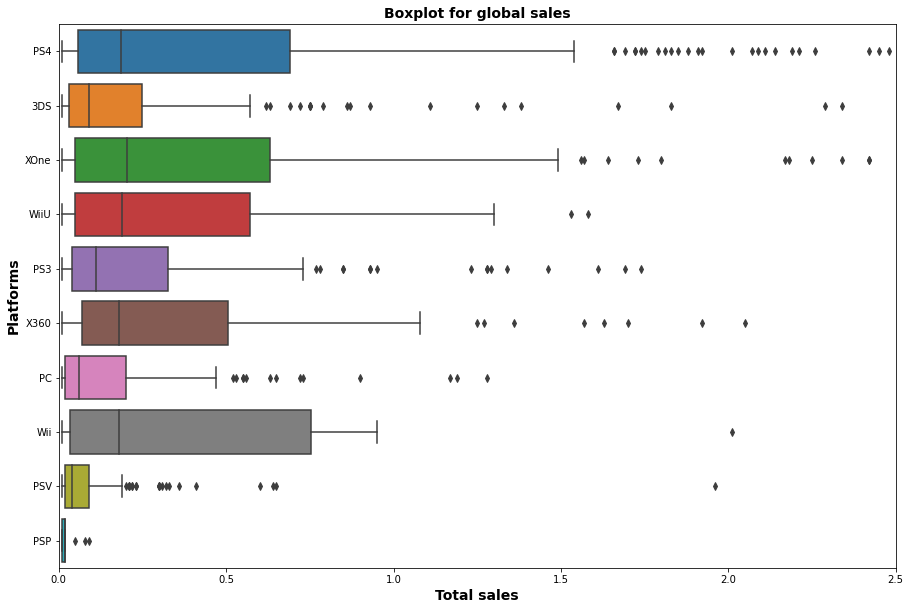

In [27]:
# Построим ящик с усами по продажам для каждой платформы
plt.figure(figsize=(15,10))
sns.boxplot(data=df_actual, x='total_sales', y='platform')

plt.title(label='Boxplot for global sales', fontsize=14, fontweight="bold")
plt.xlabel("Total sales", fontsize=14, fontweight="bold")
plt.ylabel("Platforms", fontsize=14, fontweight="bold")
plt.xlim(0, 2.5)

# Посмотрим на стат анализ
display(df_actual['total_sales'].describe())

<div style="border:solid blue 2px; padding: 20px">
Для популярных платформ граница графика на отметке около 1.5 - 1.7 млн копий. Однако можо заметить, что есть игры, которые продаются по 20+ млн копий. Скорее всего, это хиты, которые пользователи ждут по несколько лет и охотно покупают. Или же это игры из популярных серий (FIFA, HHL) которые обновляются каждый год и очень хорошо продаются. 

### Влияние оценок на продажи для платформ

Посмотрим как влияют оценки критиков и пользователей на продажи для одной популярной платформы. Для примера возьмем платформу PS4. \
Поскольку выбросы в наиболее существенной степени влияют на коэффициент корреляции Пирсона, для начала предлагаю избавиться от выбросов по продажам. 

In [28]:
# Создадим копию нашего акутального датафрейма
df_actual_clean = df_actual.copy()

# Создадим функцию для очистки данных
def clean_data(data, column):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))
    return data.loc[iqr_test]

# Применим функцию к датафреймам
df_actual_clean = clean_data(df_actual_clean, 'total_sales')

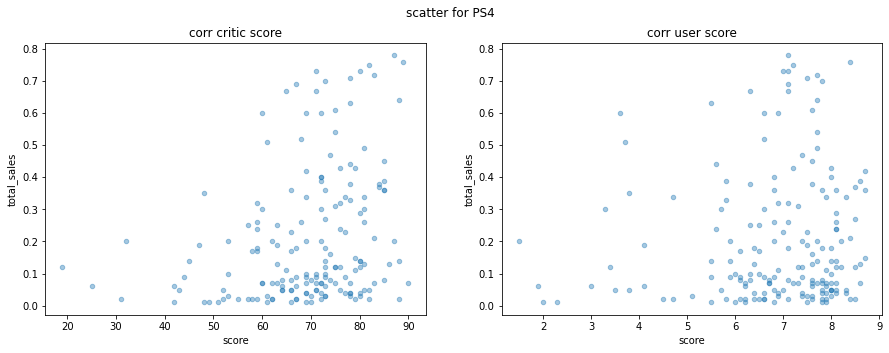

'Corr scores & total sales for PS4:'

,total_sales,critic_score,user_score
total_sales,1.000000,0.292199,0.075200
critic_score,0.292199,1.000000,0.657121
user_score,0.075200,0.657121,1.000000


In [29]:
fig, axs = plt.subplots(1,2)
fig.suptitle("scatter for PS4")
fig.set_figheight(5)
fig.set_figwidth(15)
(
    df_actual_clean[df_actual_clean['platform'] == 'PS4']
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[0])
)
(
    df_actual_clean[df_actual_clean['platform'] == 'PS4']
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[1])
)
axs[0].set_title('corr critic score') 
axs[0].set_xlabel('score')
axs[1].set_title('corr user score') 
axs[1].set_xlabel('score')
plt.show()
display('Corr scores & total sales for PS4:', df_actual_clean[df_actual_clean['platform'] == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr())
    

Итоговые продажи куда больше зависят от оценок критиков, чем от оценок пользователей. \
Также предлагаю посмотреть диаграммы рессеивания для остальных популярных платформ. 

In [30]:
df_actual_clean['platform'].unique()

array(['PS4', '3DS', 'XOne', 'X360', 'PS3', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP'], dtype=object)

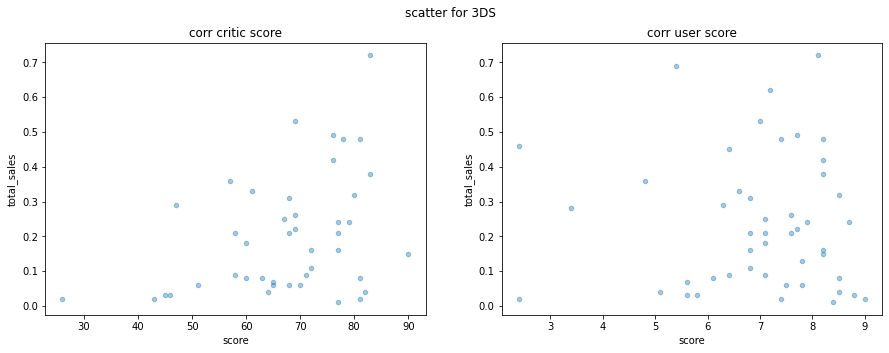

'Corr scores & total sales for 3DS:'

,total_sales,critic_score,user_score
total_sales,1.00000,0.375590,-0.042550
critic_score,0.37559,1.000000,0.863442
user_score,-0.04255,0.863442,1.000000


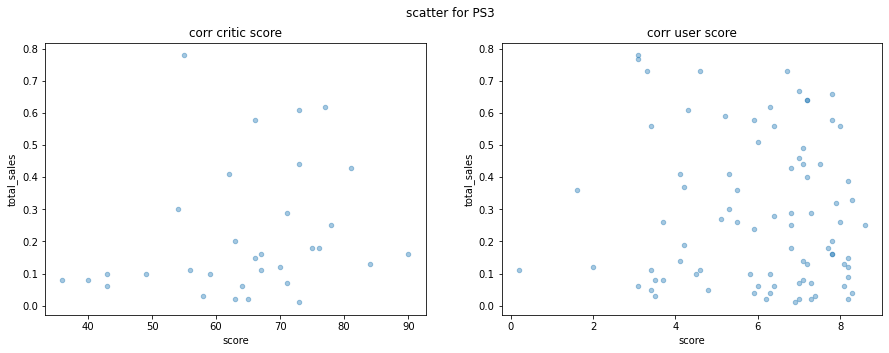

'Corr scores & total sales for PS3:'

,total_sales,critic_score,user_score
total_sales,1.000000,0.232877,-0.065751
critic_score,0.232877,1.000000,0.659473
user_score,-0.065751,0.659473,1.000000


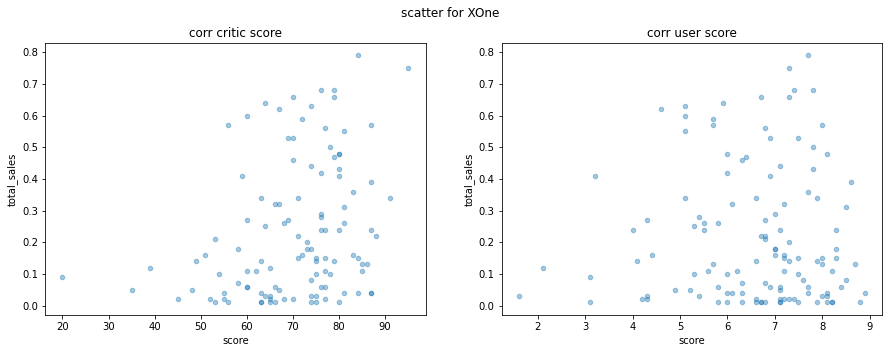

'Corr scores & total sales for XOne:'

,total_sales,critic_score,user_score
total_sales,1.000000,0.302313,-0.001581
critic_score,0.302313,1.000000,0.556140
user_score,-0.001581,0.556140,1.000000


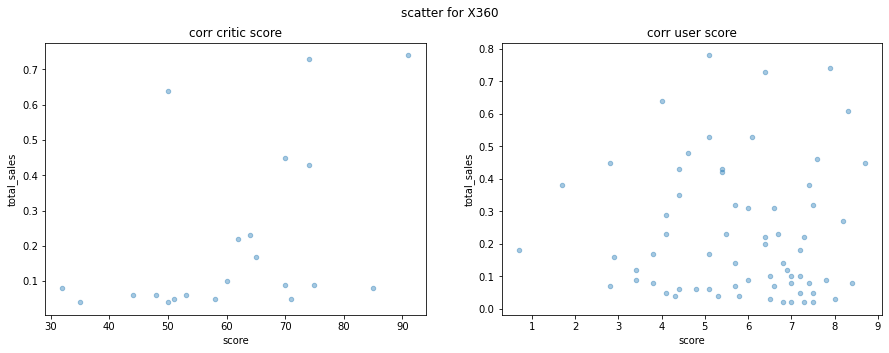

'Corr scores & total sales for X360:'

,total_sales,critic_score,user_score
total_sales,1.000000,0.459692,-0.027504
critic_score,0.459692,1.000000,0.605345
user_score,-0.027504,0.605345,1.000000


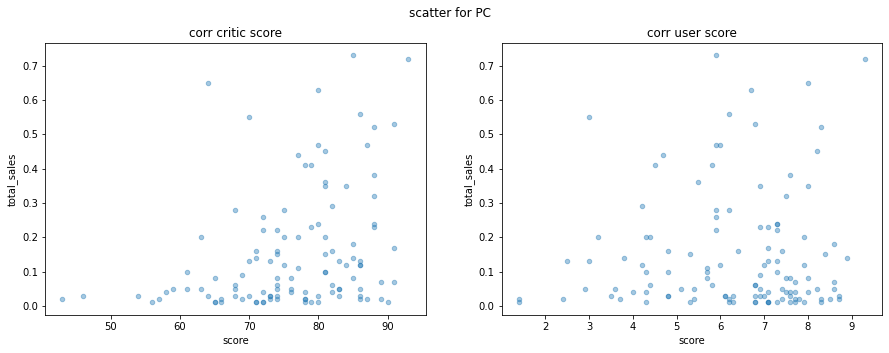

'Corr scores & total sales for PC:'

,total_sales,critic_score,user_score
total_sales,1.000000,0.330980,0.048746
critic_score,0.330980,1.000000,0.461627
user_score,0.048746,0.461627,1.000000


In [31]:
for i in ['3DS', 'PS3', 'XOne', 'X360', 'PC']:
    fig, axs = plt.subplots(1,2)
    fig.suptitle("scatter for"+' '+i)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    (
        df_actual_clean[df_actual_clean['platform'] == i]
        .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[0])
    )
    (
        df_actual_clean[df_actual_clean['platform'] == i]
        .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.4, ax=axs[1])
    )
    axs[0].set_title('corr critic score') 
    axs[0].set_xlabel('score')
    axs[1].set_title('corr user score') 
    axs[1].set_xlabel('score')
    plt.show()
    display(f'Corr scores & total sales for {i}:', df_actual_clean[df_actual_clean['platform'] == i][['total_sales', 'critic_score', 'user_score']].corr())
    
    

<div style="border:solid blue 2px; padding: 20px">
Исходя из графиков и коэффициентов корреляции можно заключить, что оценки критиков куда больше влияют на продажи, нежели оценки пользователей. Коэффициент корреляции Пирсона для между оценками критиков и общими продажами для всех популярных платформ около 0.3 - 0.4. Пользователи перед покупкой намного больше прислушиваются к мнению критиков, нежели других игроков. Также можно заметить, что общие продажи начинают расти при оценки критиков 60 и более. 

---

### Распределение игр по жанрам

Посмотрим на распределение игр по жанрам. 

<AxesSubplot:ylabel='genre'>

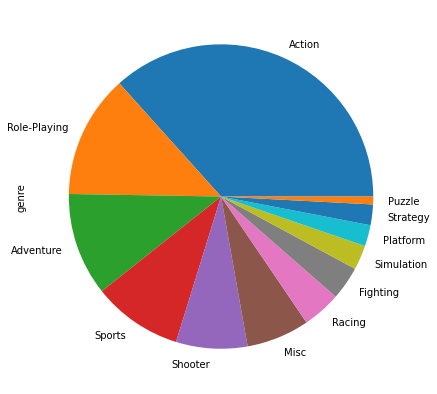

In [32]:
df_actual['genre'].value_counts().plot(kind='pie', figsize=(7,7))

Больше всего игр в жанре Экшн, далее идут приключенчиские игры, спортивыне и ролевые. 

Теперь посмотрим на самые прибыльные жанры

In [33]:
top_genre = (df_actual
             .groupby('genre', as_index=False)['total_sales']
             .agg(['count', 'sum'])
             .rename(columns={'sum': 'total_sales'})
             .sort_values('total_sales', ascending=False)
            )
top_genre

,count,total_sales
genre,,
Action,619,199.360001
Shooter,128,170.940002
Sports,161,109.480003
Role-Playing,221,101.440002
Misc,113,37.549999
Fighting,60,28.219999
Racing,69,27.520000
Platform,38,18.090000
Adventure,185,17.549999



Наиболее прибыльный с большим отрывом жанр - экшн. Также в топ входят шутеры, спортивные и ролевые игры. Наименьшей популярностью пользуются пазлы и стратегии. 
    
Взглянем на картину в разрезе платформ. Для каждой ли платформы сохранится такое распределение?
Создадим датафрейм для наиболее продаваемого жанра для каждой платформы

In [33]:
# Создадим пустой датафрейм. В него будем добавлять результаты цикла 
top_genre_by_platforms = pd.DataFrame()

for i in ['PS4', '3DS', 'PS3', 'XOne', 'X360', 'PC']:
    t1 = (df_actual[df_actual['platform'] == i]
         .groupby(['platform', 'genre'], as_index=False)['total_sales']
         .sum()
         .sort_values('total_sales', ascending=False)
         .head(1)
        )
    top_genre_by_platforms = pd.concat((top_genre_by_platforms, t1))

# Выведем итоговый датафрейм на экран
top_genre_by_platforms.reset_index(drop=True)

,platform,genre,total_sales
0,PS4,Action,91.620003
1,3DS,Role-Playing,40.020000
2,PS3,Action,18.100000
3,XOne,Shooter,55.389999
4,X360,Shooter,13.660000
5,PC,Simulation,6.590000


Как мы видим, для разных платформ отличаются самые продаваемые жанры. Для игровых приставок Sony и Xbox, наиболее популярны Экшны и Шутеры. Для компьютеров и нинтендо - Ролевые игры. А для приставки Вий - разные игры для всей семьи. 

Теперь предлагаю посмотреть на самые не продаваемые жанры по платформам. 
Воспользуюсь тем же скриптом, только выведу топ-1 снизу

In [34]:
# Создадим пустой датафрейм. В него будем добавлять результаты цикла 
worst_genre_by_platforms = pd.DataFrame()

for i in ['PS4', '3DS', 'Wii', 'PS3', 'XOne', 'X360', 'PC']:
    t1 = (df_actual[df_actual['platform'] == i]
         .groupby(['platform', 'genre'], as_index=False)['total_sales']
         .sum()
         .sort_values('total_sales', ascending=False)
         .tail(1)
        )
    worst_genre_by_platforms = pd.concat((worst_genre_by_platforms, t1))

# Выведем итоговый датафрейм на экран
worst_genre_by_platforms.reset_index(drop=True)

,platform,genre,total_sales
0,PS4,Puzzle,0.02
1,3DS,Strategy,0.78
2,Wii,Adventure,0.18
3,PS3,Puzzle,0.04
4,XOne,Strategy,0.25
5,X360,Platform,0.19
6,PC,Misc,0.05


В трех платформах из семи самый непродаваемый жанр - стратегии. Эх, а я помню как все рубились в "Казаков", "Героев" и тд:) Также можно заметить слабый интерес к пазлам. Думаю, большинство стратегий и пазлов переехали на мобильные устройства. 

---

### Платформы для разных регионов

Составим портреты пользователей по регионам. Определим самые популярные платформы и жанры для разных регионов и посмотрим как влияет рейтинг ESRB на продажи в отдельно взятом регионе. 

Сначала посмотрим на самые популряные платформы в разных регионах. Посмотрим на долю их продаж в регионе и во всем мире. 

'Top platforms for NA'

,platform,na_sales,total_sales,share_total,share_region
3,PS4,98.610001,288.149994,0.342218,0.347145
9,XOne,81.269997,140.360001,0.579011,0.286102
8,X360,28.299999,48.220001,0.586893,0.099627
0,3DS,22.639999,86.680000,0.261191,0.079701
2,PS3,22.049999,68.180000,0.323409,0.077624


'Top platforms for EU'

,platform,eu_sales,total_sales,share_total,share_region
3,PS4,130.039993,288.149994,0.451293,0.480420
9,XOne,46.250000,140.360001,0.329510,0.170866
2,PS3,25.539999,68.180000,0.374597,0.094355
1,PC,17.969999,27.050001,0.664325,0.066388
0,3DS,16.120001,86.680000,0.185971,0.059554


'Top platforms for JP'

,platform,jp_sales,total_sales,share_total,share_region
0,3DS,44.240002,86.680000,0.510383,0.475239
3,PS4,15.020000,288.149994,0.052126,0.161349
5,PSV,14.540000,22.400000,0.649107,0.156193
2,PS3,11.220000,68.180000,0.164564,0.120529
7,WiiU,7.310000,42.980000,0.170079,0.078526


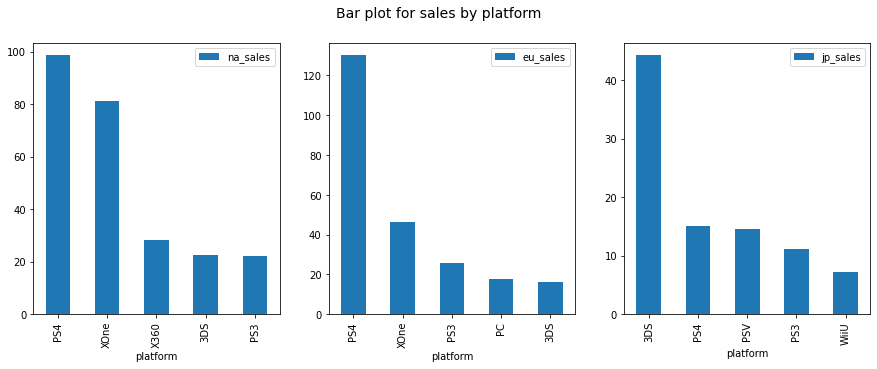

In [35]:
# Заготовка под график
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Bar plot for sales by platform", fontsize=14)

# Список регионов для исследования
li = ['na_sales', 'eu_sales', 'jp_sales']

# Цикл будет пробегаться по списку регионов и по его индексам(для расплоложения графиков на сабплоте)
for i, j in zip(li, range(len(li))):
    platform_sales = (df_actual
         .groupby('platform', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})
# Добавим share_total (долю продаж платформы в мире) и share_region (долю продаж платформы в регионе)
         .assign(share_total = (lambda x: x[i]/x['total_sales']), share_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
         .head(5)
        )
    display(f'Top platforms for {i.upper():.2}', platform_sales)     
    platform_sales.plot.bar(x='platform', y=i, ax = axs[j])

<div style="border:solid blue 2px; padding: 20px">
Вывод по платформам:
    
* У Североамериканцев с огромным перевесом лидирует PS4 с почти 100 млн проданных копий. На втором по популярносте месте XOne, и что характерно - 58% продаж для данной консоли в мире приходится именно на Америку

* у Европейцев также лидирует PS4, но уже с 130 млн проданных копий, что составляет 45% процентов от мирового рынка. Почти каждый 2й европеец выбирает именно эту платформу для игр. На втором месте XOne с 46 млн проданных копий. Также можно заметить, что PC игры проданные в Европе, составляют больше половины от всех игр для PC в мире. 

* У Японцев лидирует 3DS (44 млн копий и почти 50% от всего рынка). Но что более интересно, PSV, которая расположилась на третьем месте, занимает более 65!% от всего рынка. Можно смело сказать, что рынок Японии - рынок портативных игровых консолей, которые можно брать с собой. 

### Жанры для разных регионов

Теперь посмотрим на ситуацию с продажамми по жанрам в каждом регионе

'Top platforms for NA'

,genre,na_sales,total_sales,share_total,share_region
8,Shooter,79.019997,170.940002,0.462267,0.278181
0,Action,72.529999,199.360001,0.363814,0.255333
10,Sports,46.130001,109.480003,0.421355,0.162395
7,Role-Playing,33.470001,101.440002,0.329949,0.117827
3,Misc,15.050000,37.549999,0.400799,0.052982


'Top platforms for EU'

,genre,eu_sales,total_sales,share_total,share_region
0,Action,74.680000,199.360001,0.374599,0.275898
8,Shooter,65.519997,170.940002,0.383292,0.242057
10,Sports,45.730000,109.480003,0.417702,0.168945
7,Role-Playing,28.170000,101.440002,0.277701,0.104071
6,Racing,14.130000,27.520000,0.513445,0.052202


'Top platforms for JP'

,genre,jp_sales,total_sales,share_total,share_region
7,Role-Playing,31.16,101.440002,0.307177,0.334730
0,Action,29.58,199.360001,0.148375,0.317757
2,Fighting,6.37,28.219999,0.225726,0.068428
3,Misc,5.61,37.549999,0.149401,0.060264
8,Shooter,4.87,170.940002,0.028490,0.052315


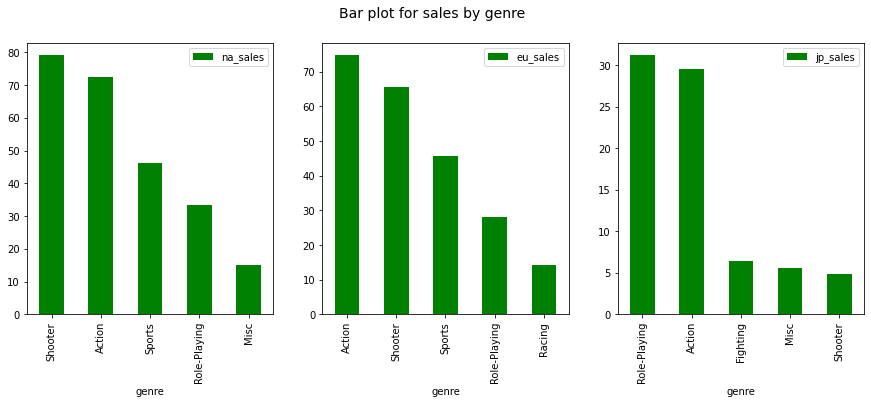

In [36]:
# Использую тот же скрипт, что и для платформ, только немного скорректирую группировку

# Заготовка под график
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Bar plot for sales by genre", fontsize=14)

# Список регионов для исследования
li = ['na_sales', 'eu_sales', 'jp_sales']

# Цикл будет пробегаться по списку регионов и по его индексам(для расплоложения графиков на сабплоте)
for i, j in zip(li, range(len(li))):
    genre_sales = (df_actual
         .groupby('genre', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})
# Добавим share_total (долю продаж платформы в мире) и share_region (долю продаж платформы в регионе)
         .assign(share_total = (lambda x: x[i]/x['total_sales']), share_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
         .head(5)
        )
    display(f'Top platforms for {i.upper():.2}', genre_sales)     
    genre_sales.plot.bar(x='genre', y=i, color='g', ax = axs[j])

Можно заметить, что в целом рынки Америки и Европы очень схожи. У обоих лидируют экшены и шутеры. Спортивные игры тоже в топе. А вот в Азии более развиты продажи Ролевых игр, а шутеры занимают лишь последнее место в топ-5

### Рейтин ESRB для разных регионов

Теперь исследуем влияния рейтинга ESRB на продажи в отдельном регионе. \
Для начала расшифруем рейтинг:
- «E» («Everyone») — «Для всех»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»:


'Top platforms for NA'

,rating,na_sales,total_sales,share_total,share_region
2,M,96.419998,226.539993,0.425620,0.339435
4,Unknown,64.720001,198.970001,0.325275,0.227839
0,E,50.740002,133.130005,0.381131,0.178624
3,T,38.950001,99.129997,0.392918,0.137119
1,E10+,33.230000,71.680000,0.463588,0.116982


'Top platforms for EU'

,rating,eu_sales,total_sales,share_total,share_region
2,M,93.440002,226.539993,0.412466,0.345205
4,Unknown,58.950001,198.970001,0.296276,0.217785
0,E,58.060001,133.130005,0.436115,0.214497
3,T,34.070000,99.129997,0.343690,0.125868
1,E10+,26.160000,71.680000,0.364955,0.096645


'Top platforms for JP'

,rating,jp_sales,total_sales,share_total,share_region
4,Unknown,56.900002,198.970001,0.285973,0.611236
3,T,14.780000,99.129997,0.149097,0.158771
0,E,8.940000,133.130005,0.067152,0.096036
2,M,8.010000,226.539993,0.035358,0.086046
1,E10+,4.460000,71.680000,0.062221,0.047911


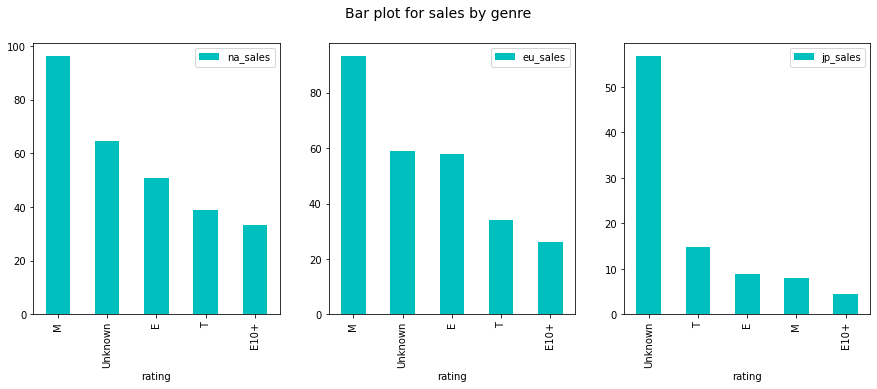

In [37]:
# Заготовка под график
fig, axs = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle("Bar plot for sales by genre", fontsize=14)

# Список регионов для исследования
li = ['na_sales', 'eu_sales', 'jp_sales']

# Цикл будет пробегаться по списку регионов и по его индексам(для расплоложения графиков на сабплоте)
for i, j in zip(li, range(len(li))):
    rating_sales = (df_actual
         .groupby('rating', as_index=False)
         .agg({i:'sum', 'total_sales':'sum'})
# Добавим share_total (долю продаж платформы в мире) и share_region (долю продаж платформы в регионе)
         .assign(share_total = (lambda x: x[i]/x['total_sales']), share_region = (lambda x: x[i]/x[i].sum()))
         .sort_values(i, ascending=False)
        )
    display(f'Top platforms for {i.upper():.2}', rating_sales)     
    rating_sales.plot.bar(x='rating', y=i, color='c', ax = axs[j])

<div style="border:solid blue 2px; padding: 20px">Вывод по рейтингу следующий:
У североамериканце и Европейцев распредление практически одинаково. Игры для взрослых, игры с неизвестным рейтингом, игры для всех, затем игры для подростков и игры для детей старше 10 лет. Интересно что для обоих рынокв (Америка и Европа) почти треть продаж приходится на игры с неизвестным рейтингом. А вот на азиатском рынке игры для взрослых занимают лишь четвертую строчку и всего лишь 3% от мирового рынка. Зато лидирует здесь именно продажи игр с неизвестным рейтингом.  

### Портрет пользователя по регионам

<div style="border:solid blue 2px; padding: 20px">
Можно составить портрет среднестатистического пользователя по регионам:
    
* Для Североамериканце характерны игры на консолях PS4 в жанре Шутер и рейтинг "для взрослых"
    
* Для Европейца характерны игры на консолях PS4 в жанре Экшн и рейтинг "для взрослых"

* Для Азии характерны игры для портативных консолей в жанре ролевых игр и с неизвестным рейтингом. Жанр спорт в азии практически не пользуются популярностью. 

---

## Проверка гипотез

Необходимо проверить следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативные гипотезы:
- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются


Сохраним 2 датафрейма, применив фильтр к ранее очищенным данным

In [38]:
df_xbox = df_actual_clean[df_actual_clean['platform'] == 'XOne'].dropna(subset=['user_score']).copy()
df_pc = df_actual_clean[df_actual_clean['platform'] == 'PC'].dropna(subset=['user_score']).copy()

Проверим являются ли наши выборки однородными (с равными дисперсиями). Применим тест Левена: Если pvalue > 0.05, то выборки считаются однородными по дисперсии и в ttest_ind параметр equal_var=True. В противном случае, equal_var=False

In [39]:
print('Average score variance for PC:',df_xbox['user_score'].var())
print('Average score variance for XOne:',df_pc['user_score'].var())
st.levene(df_xbox['user_score'], df_pc['user_score'])

Average score variance for PC: 2.0260164737701416
Average score variance for XOne: 2.9189116954803467


LeveneResult(statistic=3.8319583512472493, pvalue=0.05145288269747764)

p-value > 5%. Оставляем значение equal_var по умолчанию

In [40]:
# Зададим уровень значимости в 5%
alpha = 0.05

# Результат теста
results = st.ttest_ind(df_xbox['user_score'], df_pc['user_score'])

# Выведем на экран значение p-уровня значимости
print(f'p-значение: {results.pvalue}')

# Ответ
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15916102601740792
Не получилось отвергнуть нулевую гипотезу


Значение p-value более 5%. Можно сказать, что с вероятностью в 15% отвергнуть нулевую гипотезу будет ошибкой.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативные гипотезы:
- H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - Средние пользовательские рейтинги жанров Action и Sports различаются

In [41]:
df_action = df_actual_clean[df_actual_clean['genre'] == 'Action'].dropna(subset=['user_score']).copy()
df_sports = df_actual_clean[df_actual_clean['genre'] == 'Sports'].dropna(subset=['user_score']).copy()

Проверим являются ли наши выборки однородными (с равными дисперсиями). Применим тест Левена: Если pvalue > 0.05, то выборки считаются однородными по дисперсии и в ttest_ind параметр equal_var=True. В противном случае, equal_var=False

In [42]:
print('Average score variance for PC:',df_action['user_score'].var())
print('Average score variance for XOne:',df_sports['user_score'].var())
st.levene(df_action['user_score'], df_sports['user_score'])

Average score variance for PC: 1.9772509336471558
Average score variance for XOne: 4.034075736999512


LeveneResult(statistic=25.780059285173678, pvalue=6.281483776495217e-07)

p-value < 5%. Следовательно equal_var=False

In [43]:
# Зададим уровень значимости в 5%
alpha = 0.05

# Результат теста
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=False)

# Выведем на экран значение p-уровня значимости
print(f'p-значение: {results.pvalue}')

# Ответ
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.895180482142136e-10
Отвергаем нулевую гипотезу


Уровень p-значимости невероятно мал. Это значит, что вероятность получить такой результат или более далекий от предполагаемого ничтожно мала. Мы смело отвергаем нулевую гипотезу.

___

## Вывод

Работа полошла к концу. Был выполнен большой объём работы:
- Познакомились с данными
- Выполнили предобработку данных: привели в порядок названия колонок, преобразовали типы, избавились от дубликатов, проверили аномалии, заполнили пропуски
- Сделали рассчеты: посчитали суммарные продажи для каждой игры
- Выполнили исследовательский анализ данных: посмотрели зависимость продаж от регионов, жанров, платформ, оценок. Посмотрели сколько игр выпускалось в разные годы. Определили "срок жизни" платформ, определили актуальный период для анализа данных. Изучили данные на выбросы и обработали их. 
- Составили потенциальные портреты пользователей по регионам
- Проверили гипотезы: Отличаются ли среднии оценки пользователей для 2х платформ и 2х жанров игр

Можно сделать несколько выводов по данной работе:
- Количество игр, выпускаемых для всех платформ резко уменьшается с 2010 года. Это обусловлено развитием рынка мобильных устройств
- Срок жизни для популярных платформ в среднем 10 лет. Пик популярности приходится на 5й год
- Оценки критиков куда больше влияют на продажи игр, нежели оценки пользователей. К Критиком больше прислушиваются. 
- Самый популярный жанр - Экшн. Также популярны шутеры, спортивные и ролевые игры. 
- Платформы для игр сильно отличаются по регионам. Если в Америке и Европе это xbox и ps соответственно, то для Азии более популярны портитивыне консоли типа Nintendo и PSP
- Также для Америки и Европы более популярны жанры экшн и шутеры, а в Азии ролевые игры. Шутеры и Спортивные игры в Азии практически не пользуются популярностью
- Для азии также нельзя рассматривать как перспективные игры - игры с рейтингом "для взрослых". Всего 3% от мирового рынка. 
- Средние оценки пользователей PC и XOne не отличаются
- Средние оценки пользователей игры в жанре Action и Sports отличаются